In [168]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.



In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading & Checking dataset

In [170]:
# Replace the URL below with your GitHub raw file URL
url = "https://raw.githubusercontent.com/IKRAMJAAFAR/DeeL/refs/heads/main/dataset.csv?token=GHSAT0AAAAAACZZJM4A75DJZ7QS6RRPDJOOZZDRB5A"

# Load the dataset directly into a DataFrame
df = pd.read_csv(url, index_col=0)
# Display the first few rows of the dataframe
df

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820
...,...,...
10315,2015-01-31 21:30:00,24670
10316,2015-01-31 22:00:00,25721
10317,2015-01-31 22:30:00,27309
10318,2015-01-31 23:00:00,26591


In [171]:
# Checking NULL values
print(df.isna().sum())
df.info()

timestamp    0
value        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 10320 entries, 0 to 10319
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  10320 non-null  object
 1   value      10320 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 241.9+ KB


In [172]:
# Converting to a datetime object
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestampTemp'] = pd.to_datetime(df['timestamp'])
# Setting a datetime index to the dataframe
df = df.set_index('timestamp')
df.head()

,value,timestampTemp
timestamp,,
2014-07-01 00:00:00,10844,2014-07-01 00:00:00
2014-07-01 00:30:00,8127,2014-07-01 00:30:00
2014-07-01 01:00:00,6210,2014-07-01 01:00:00
2014-07-01 01:30:00,4656,2014-07-01 01:30:00
2014-07-01 02:00:00,3820,2014-07-01 02:00:00


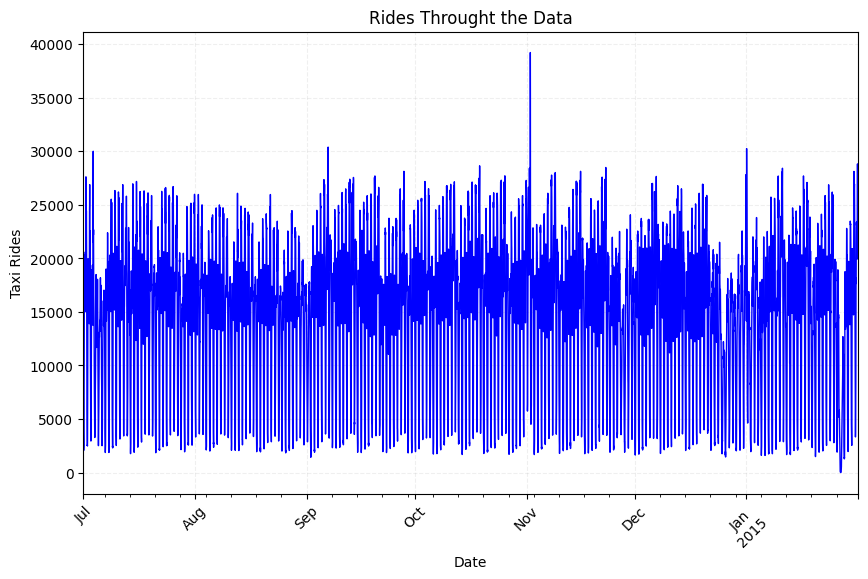

In [173]:
df['value'].plot(figsize=(10, 6), color='blue', linewidth=1)


plt.xlabel('Date')
plt.ylabel('Taxi Rides')
plt.title('Rides Throught the Data')


plt.xticks(rotation=45)

plt.grid(True, linestyle='--', alpha=0.2)

plt.show()

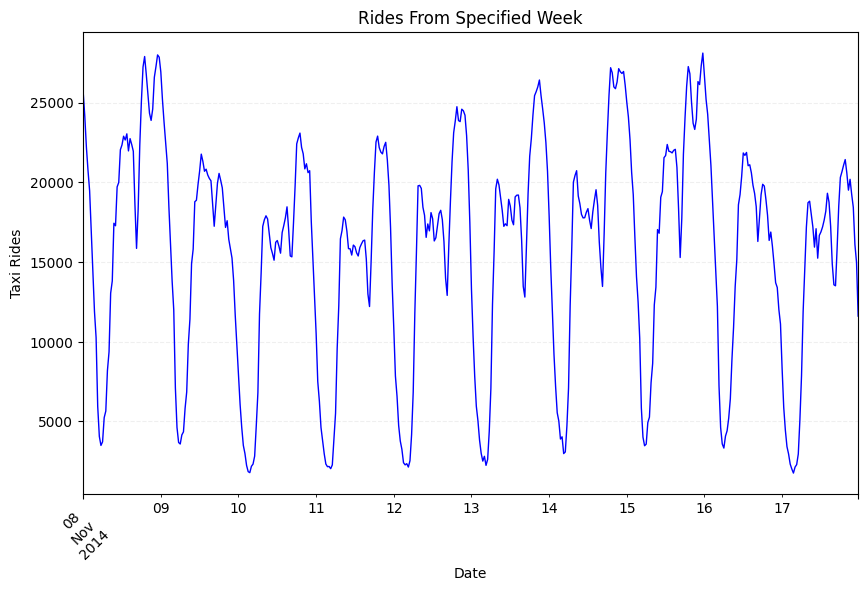

In [174]:
df.loc["2014-11-08":"2014-11-17"]['value'].plot(figsize=(10, 6), color='blue', linewidth=1)


plt.xlabel('Date')
plt.ylabel('Taxi Rides')
plt.title('Rides From Specified Week')


plt.xticks(rotation=45)

plt.grid(True, linestyle='--', alpha=0.2)

plt.show()

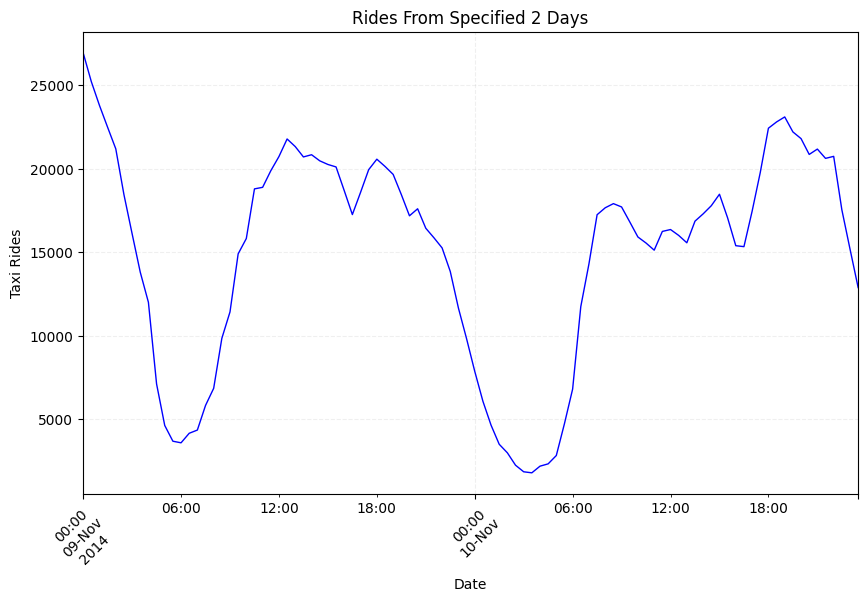

In [175]:
df.loc["2014-11-09":"2014-11-10"]['value'].plot(figsize=(10, 6), color='blue', linewidth=1)


plt.xlabel('Date')
plt.ylabel('Taxi Rides')
plt.title('Rides From Specified 2 Days')


plt.xticks(rotation=45)

plt.grid(True, linestyle='--', alpha=0.2)

plt.show()

# Detecting the 5 notable outliers

## November
- 2 November 14 (NYC Marathon)
- 13 to 21 November 14 (Snowstorm)
- 27 November 14 (Thanksgiving)

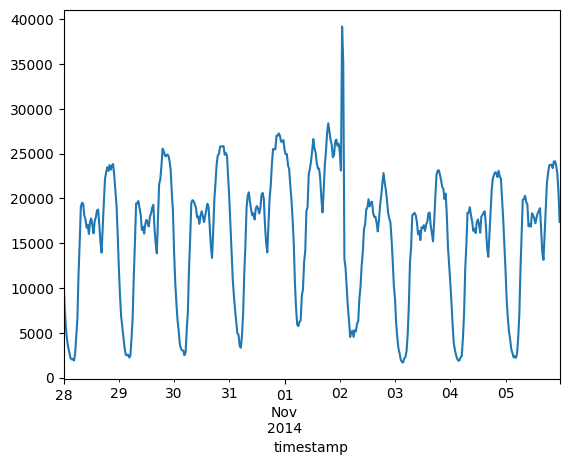

In [183]:
df.loc["2014-10-28":"2014-11-05"]['value'].plot()
plt.show()

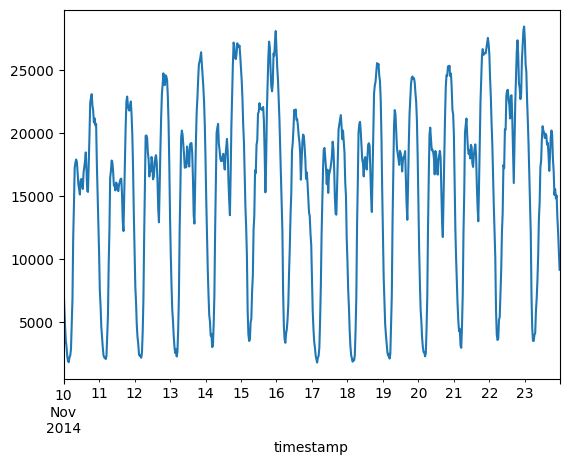

In [186]:
df.loc["2014-11-10":"2014-11-23"]['value'].plot()
plt.show()

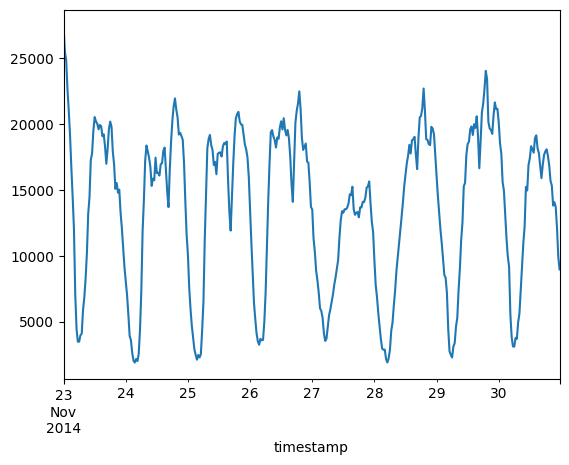

In [184]:
df.loc["2014-11-23":"2014-11-30"]['value'].plot()
plt.show()

## Snow storm & Christmas 
- 25 December 14
- 9 to 11 December 14
- 26 to 27 January 15

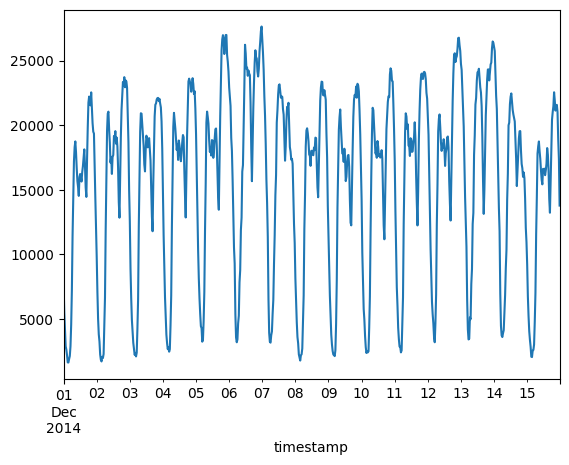

In [178]:
df.loc["2014-12-01":"2014-12-15"]['value'].plot()
plt.show()

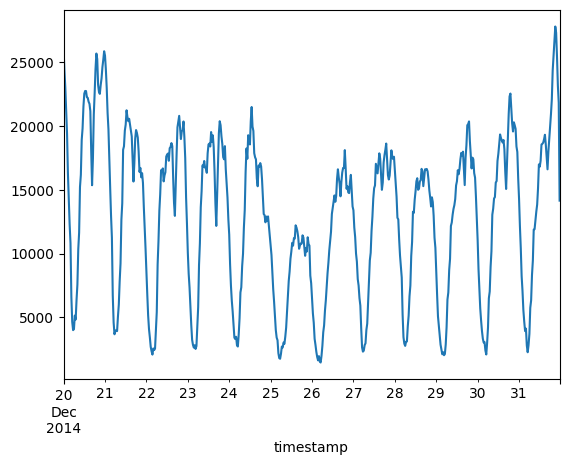

In [179]:
df.loc["2014-12-20":"2014-12-31"]['value'].plot()
plt.show()

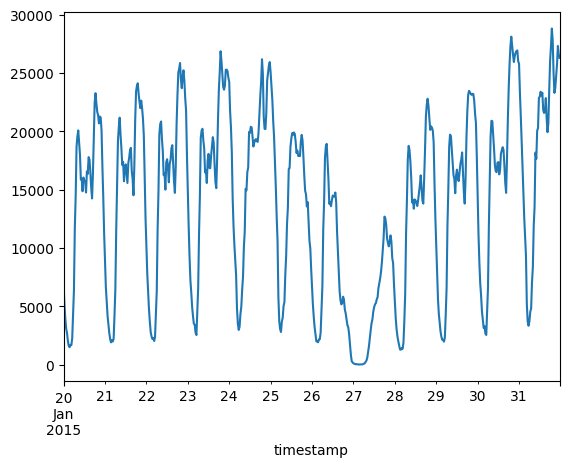

In [181]:
df.loc["2015-01-20":]['value'].plot()
plt.show()

## New Years 
- 1 Jan 15

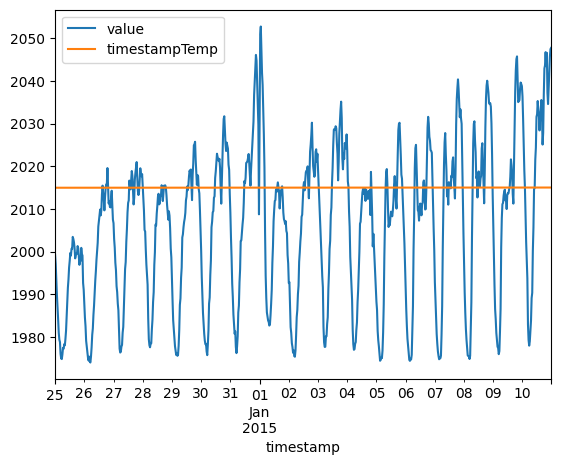

In [ ]:
df.loc["2014-12-25":"2015-01-10"].plot()
plt.show()

# Observation from above
- Show anomaly on specific date due to weather (impossible from dataset) or festive event (almost predictable?)
- Taxi usage depends on the date & time itself
- Possibly related to the day of the week and type of the day
- The current day is mostly must be average/closely similar with previous few days

Idea:
- Add new columns (month, day, dayName, weekend)
- Add timer (hour)

In [ ]:
df['year'] = df.timestampTemp.dt.year
df['month'] = df.timestampTemp.dt.month
df['day'] = df.timestampTemp.dt.day
df['dayName'] = df.timestampTemp.dt.day_of_week
df['hour'] = df.timestampTemp.dt.hour
df = df.drop(['timestampTemp'], axis=1)
df.head()

,value,year,month,day,dayName,hour
timestamp,,,,,,
2014-07-01 00:00:00,10844,2014,7,1,1,0
2014-07-01 00:30:00,8127,2014,7,1,1,0
2014-07-01 01:00:00,6210,2014,7,1,1,1
2014-07-01 01:30:00,4656,2014,7,1,1,1
2014-07-01 02:00:00,3820,2014,7,1,1,2


In [ ]:
df['is_weekend'] = df.dayName.map({0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 1})
df.head()

,value,year,month,day,dayName,hour,is_weekend
timestamp,,,,,,,
2014-07-01 00:00:00,10844,2014,7,1,1,0,0
2014-07-01 00:30:00,8127,2014,7,1,1,0,0
2014-07-01 01:00:00,6210,2014,7,1,1,1,0
2014-07-01 01:30:00,4656,2014,7,1,1,1,0
2014-07-01 02:00:00,3820,2014,7,1,1,2,0


C:\Users\weare\AppData\Local\Temp\ipykernel_728\1755746321.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=daily, x='hour', y='value', ci=None, errorbar=None)


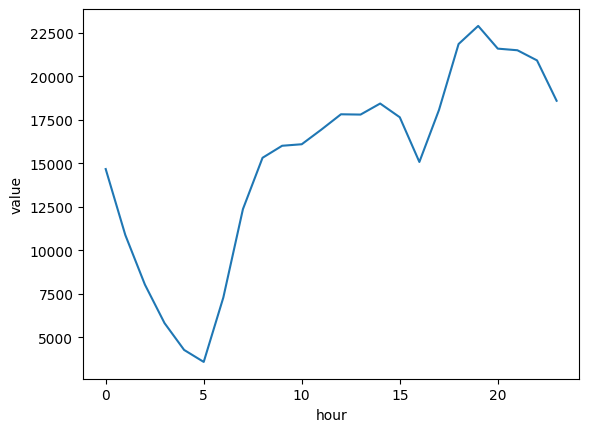

In [ ]:
daily = df.groupby(['hour', 'day'])['value'].mean().reset_index()

sns.lineplot(data=daily, x='hour', y='value', ci=None, errorbar=None)
plt.show()

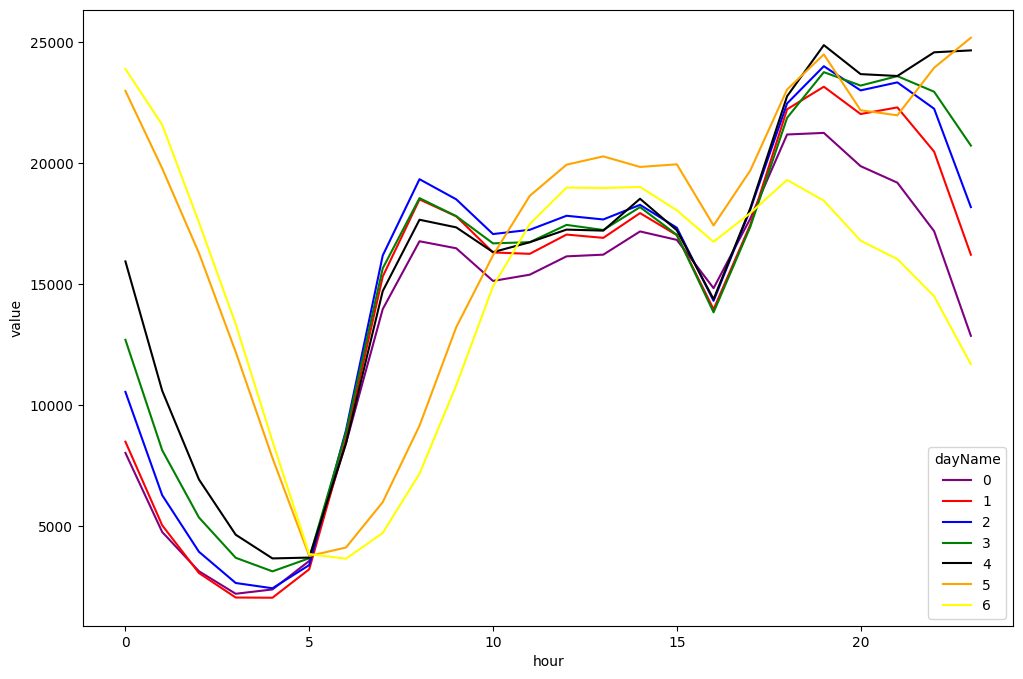

In [ ]:
plt.figure(figsize=(12, 8))

daily = df.groupby(['hour', 'dayName'])['value'].mean().reset_index()

sns.lineplot(data=daily, x='hour', y='value', hue='dayName', palette=['purple','red', 'blue', 'green', 'black','orange','yellow'])
plt.show()

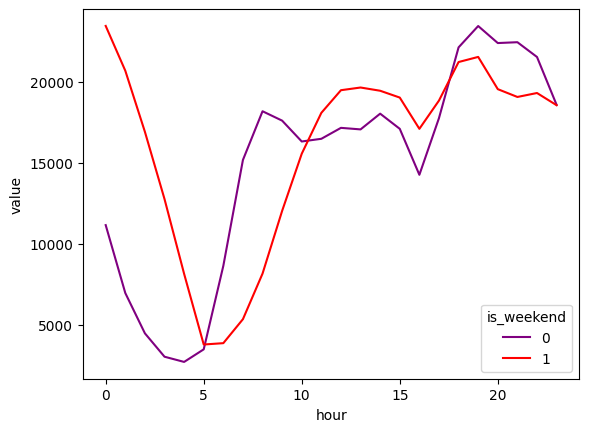

In [ ]:
weekend = df.groupby(['hour', 'is_weekend'])['value'].mean().reset_index()

sns.lineplot(data=weekend, x='hour', y='value', hue='is_weekend', palette=['purple','red'])
plt.show()

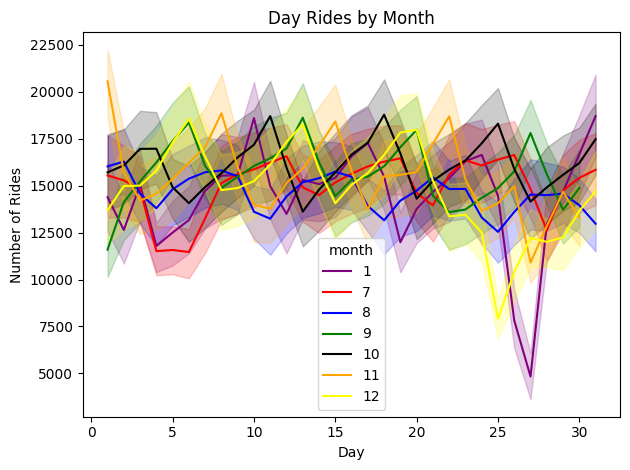

In [ ]:
sns.lineplot(
    x="day", 
    y="value",
    data=df,
    palette=['purple','red', 'blue', 'green', 'black','orange','yellow'],
    
    hue= "month")
plt.xlabel("Day")
plt.ylabel("Number of Rides")
plt.title("Day Rides by Month")
plt.tight_layout()
plt.show()

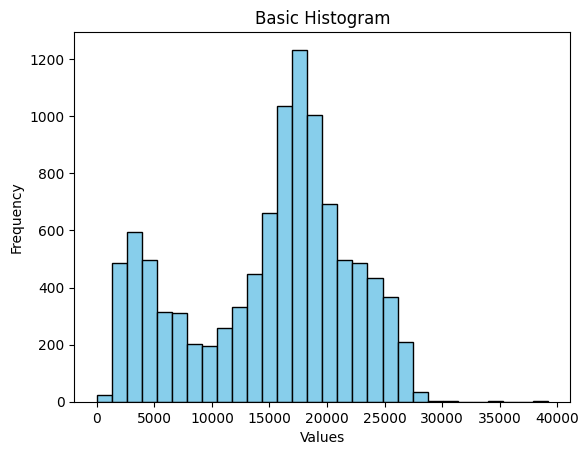

In [189]:
# Plotting a basic histogram
plt.hist(df['value'], bins = 30, color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Basic Histogram')
 
# Display the plot
plt.show()